<a href="https://colab.research.google.com/github/rishindrasai/ExplainableAI_Assignment/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline Value (mean disease progression in training set): 153.73654390934846

Regression Metrics:
MSE : 2900.193628493482
RMSE: 53.85344583676593
MAE : 42.79409467959994
MAPE: 37.49982636756113
MPE : -12.889615003286945
R² Score: 0.4526027629719195

SHAP Summary Plot:


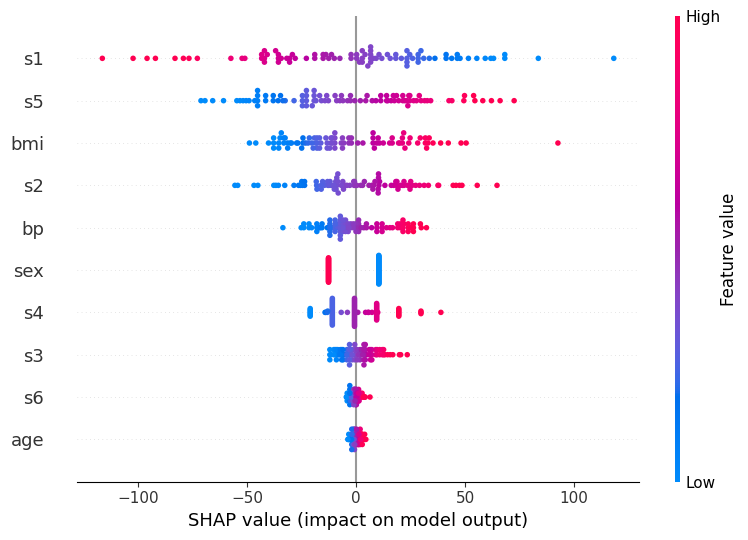


SHAP Bar Plot:


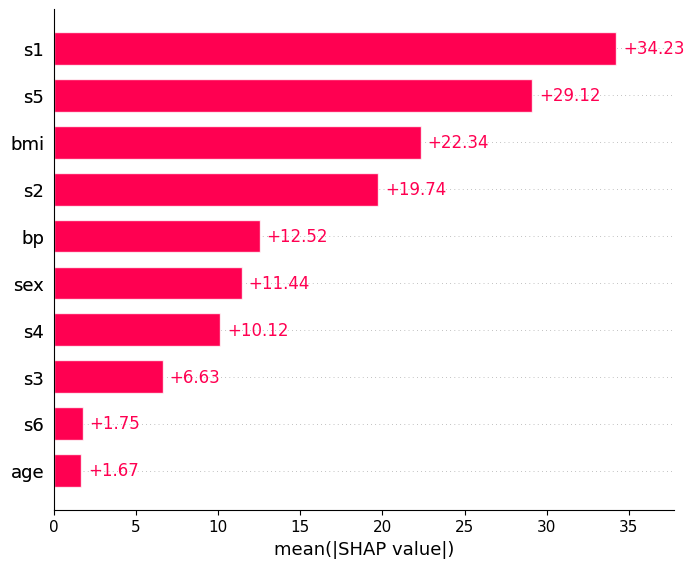


SHAP Force Plot :


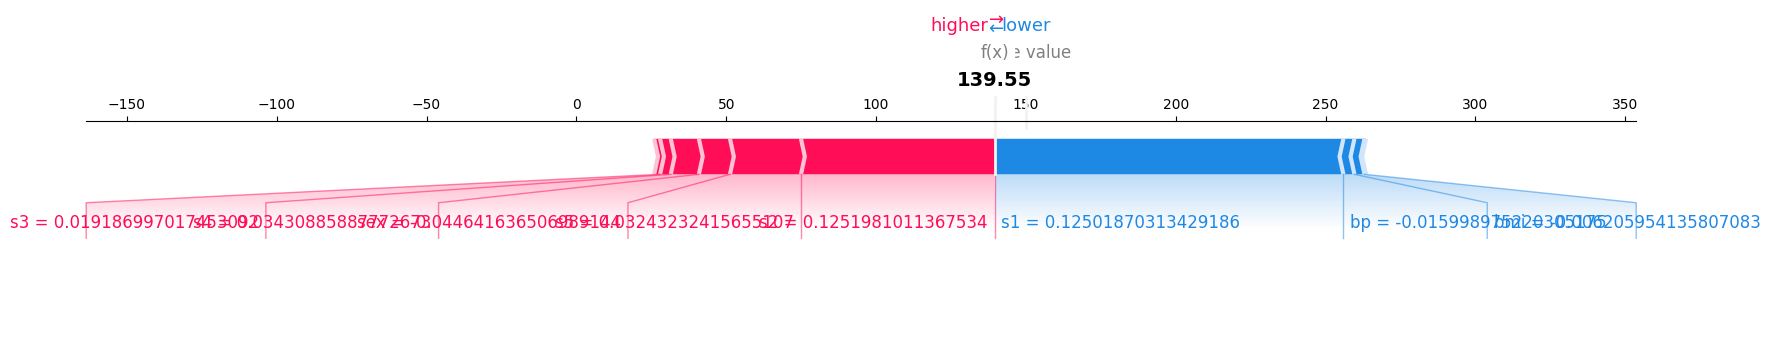

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)

# 1. Load Diabetes Dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="disease_progression")

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Baseline value (mean of training target)
baseline_value = np.mean(y_train)
print("Baseline Value (mean disease progression in training set):", baseline_value)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Regression Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100
r2 = r2_score(y_test, y_pred)

print("\nRegression Metrics:")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE:", mape)
print("MPE :", mpe)
print("R² Score:", r2)

# 7. SHAP Analysis
explainer = shap.Explainer(model, X_train)
shap_vals = explainer(X_test)

print("\nSHAP Summary Plot:")
shap.summary_plot(shap_vals, X_test, show=True)

print("\nSHAP Bar Plot:")
shap.plots.bar(shap_vals, show=True)

print("\nSHAP Force Plot :")
shap.force_plot(
    explainer.expected_value,      # base value
    shap_vals[0].values,           # SHAP values for sample 0
    features=X_test.iloc[0],       # feature values of sample 0
    matplotlib=True                # render with matplotlib
)
plt.show()